<a href="https://colab.research.google.com/github/SaurabhSRP/Stock-Price-Prediction-Projects/blob/main/Microsoft_stock_price_prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
#import all libraries
import math 
import yfinance as yf
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
df=yf.download('MSFT',start='2017-01-01',end='2022-01-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03 00:00:00-05:00,62.790001,62.840000,62.130001,62.580002,57.807831,20694100
2017-01-04 00:00:00-05:00,62.480000,62.750000,62.119999,62.299999,57.549171,21340000
2017-01-05 00:00:00-05:00,62.189999,62.660000,62.029999,62.299999,57.549171,24876000
2017-01-06 00:00:00-05:00,62.299999,63.150002,62.040001,62.840000,58.047993,19922900
2017-01-09 00:00:00-05:00,62.759998,63.080002,62.540001,62.639999,57.863243,20382700
...,...,...,...,...,...,...
2021-12-27 00:00:00-05:00,335.459991,342.480011,335.429993,342.450012,340.227112,19947000
2021-12-28 00:00:00-05:00,343.149994,343.809998,340.320007,341.250000,339.034882,15661500
2021-12-29 00:00:00-05:00,341.299988,344.299988,339.679993,341.950012,339.730377,15042000


#Visualise the Closing price of Micrsoft stock data

Text(0, 0.5, 'Close price USD $')

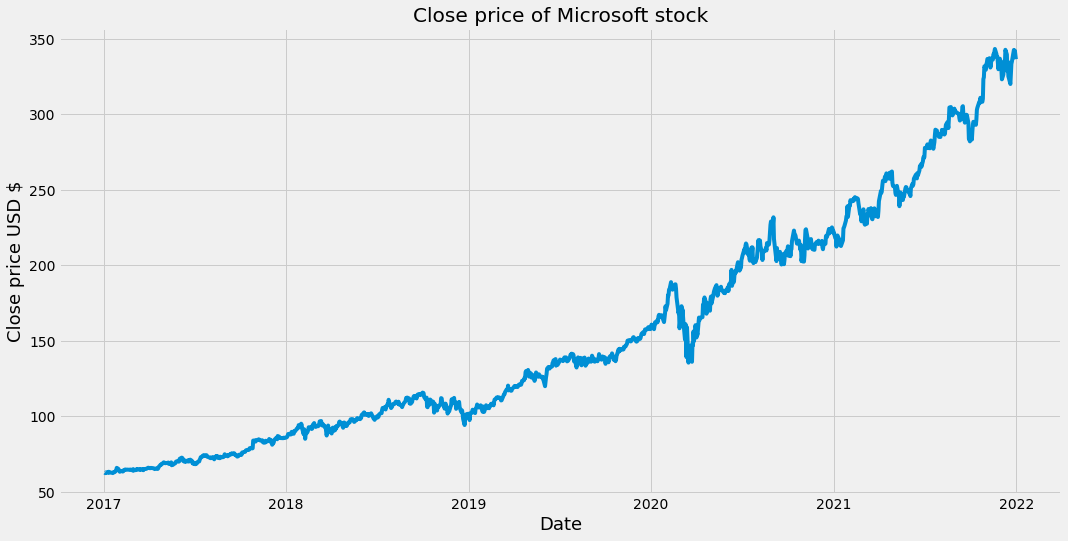

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Close price of Microsoft stock")
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD $',fontsize=18)

In [ ]:
##Create a new DataFrame for closing price
data=df.filter(['Close'])
##Convert the dataframe to a nummpy array
dataset=data.values
#Get the number of rows to train the model on using 80% of the data
training_data_len= math.ceil( len(dataset)* .8)   #using math to round up

training_data_len

1008

#MinMax scaling of the data for LSTM model

In [ ]:
##Scale the data using MinMax
scaler=MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(dataset)

##Create X_train and y_train data for our model

In [ ]:
##Create training data set
#Create the scaled training data set
train_data=scaled_data[0:training_data_len, :]

#split the data into x_train and y_train data sets
X_train=[]
y_train=[]

for i in range(60,len(train_data)):
  X_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])



In [ ]:
#Convert the X_train and y_train to numpy arrays
X_train,y_train=np.array(X_train),np.array(y_train)

In [ ]:
X_train.shape

(948, 60)

##LSTM model requires Data in 3 dimension

In [ ]:
##Reshape the data to (number of samples , no of timesteps, no of features=1 (only closing price is considered))
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(948, 60, 1)

#Create the LSTM model

In [ ]:
model=Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1))) #as this is the first layer we have to give input shape 

#Second layer
model.add(LSTM(50,return_sequences=False)) 

model.add(Dense(25))
model.add(Dense(1))

In [ ]:
##Compile the model 
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model for 100 epochs

In [ ]:
##Train the model
model.fit(X_train,y_train,batch_size=32, epochs=100)

Epoch 1/100
30/30 [==============================] - 8s 59ms/step - loss: 0.0105
Epoch 2/100
30/30 [==============================] - 2s 61ms/step - loss: 5.4733e-04
Epoch 3/100
30/30 [==============================] - 2s 57ms/step - loss: 3.6148e-04
Epoch 4/100
30/30 [==============================] - 2s 61ms/step - loss: 3.4218e-04
Epoch 5/100
30/30 [==============================] - 2s 61ms/step - loss: 3.1536e-04
Epoch 6/100
30/30 [==============================] - 3s 86ms/step - loss: 3.1531e-04
Epoch 7/100
30/30 [==============================] - 3s 89ms/step - loss: 3.0066e-04
Epoch 8/100
30/30 [==============================] - 3s 91ms/step - loss: 2.9257e-04
Epoch 9/100
30/30 [==============================] - 2s 56ms/step - loss: 3.2306e-04
Epoch 10/100
30/30 [==============================] - 2s 63ms/step - loss: 3.1741e-04
Epoch 11/100
30/30 [==============================] - 2s 79ms/step - loss: 2.8290e-04
Epoch 12/100
30/30 [==============================] - 2s 76ms/step 

#Prepare the test data for prediction

In [ ]:
##Create a new array containing scaled values from index 1542 to 2003
test_data=scaled_data[training_data_len-60: , :]
#Create the dataset X_test and y_test

X_test=[]
y_test=dataset[training_data_len:, : ]

for i in range(60,len(test_data)):
  X_test.append(test_data[i-60:i, 0])

In [ ]:
##COnvert the test data to a numpy array
X_test=np.array(X_test)

##Reshape to 3-Dim for LSTM
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1], 1 ))

In [ ]:
X_test.shape

(251, 60, 1)

#Prediction

In [ ]:
Predictions=model.predict(X_test)
Predictions=scaler.inverse_transform(Predictions)

In [ ]:
Predictions.shape

(251, 1)

In [ ]:
##We will use RMSE metrics for model evaluation
rmse=np.sqrt(np.mean(Predictions - y_test)**2)
rmse

9.033740769344497

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


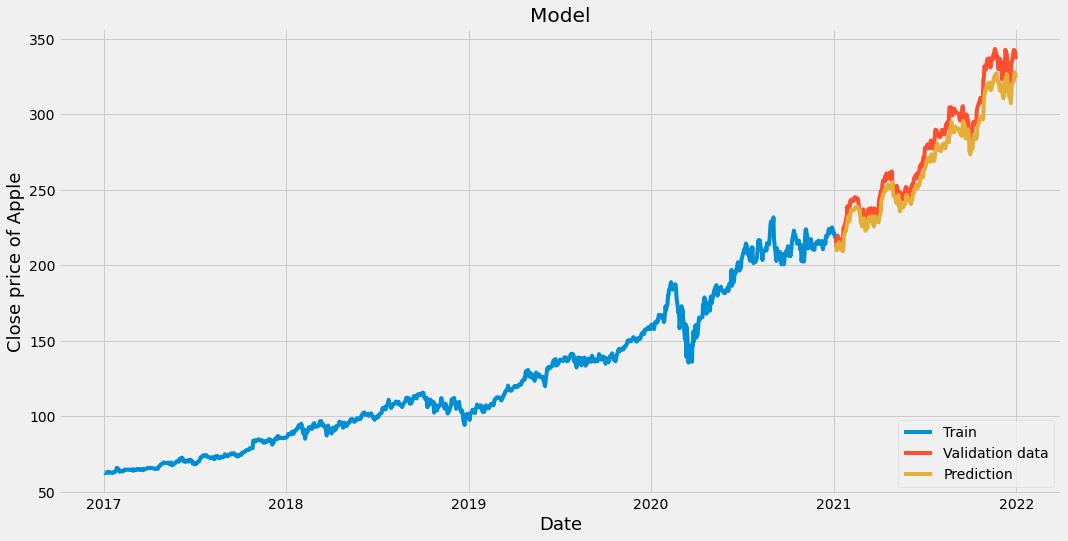

In [ ]:
##Plot the data
train=data[ :training_data_len]
valid=data[training_data_len: ]
valid['Predictions']=Predictions

##visualise the model
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price of Apple', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Validation data','Prediction'], loc='lower right')
plt.show()

In [ ]:
##Lets compare the predicted and validation price
valid

,Close,Predictions
Date,,
2021-01-05 00:00:00-05:00,217.899994,214.700516
2021-01-06 00:00:00-05:00,212.250000,213.533203
2021-01-07 00:00:00-05:00,218.289993,209.822922
2021-01-08 00:00:00-05:00,219.619995,212.322601
2021-01-11 00:00:00-05:00,217.490005,215.150772
...,...,...
2021-12-27 00:00:00-05:00,342.450012,322.134949
2021-12-28 00:00:00-05:00,341.250000,327.716888
2021-12-29 00:00:00-05:00,341.950012,327.312439
